<a href="https://colab.research.google.com/github/Blackcurrant06/MachineLearning/blob/main/Week7/Boosting_or_Bagging_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install xgboost

In [1]:
import pandas as pd

try:
    df_infrared = pd.read_csv('Infrared.csv')
    df_boston = pd.read_csv('BostonHousing.csv')
    df_automobile = pd.read_csv('Automobile.csv')

    display(df_infrared.head())
    display(df_boston.head())
    display(df_automobile.head())
except FileNotFoundError:
    print("One or more files not found.")
except pd.errors.ParserError:
    print("Error parsing one or more CSV files.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,...,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1,aveOralM
0,Male,41-50,White,24.0,28.0,0.8,0.7025,35.0300,35.3775,34.4000,...,33.4775,33.3725,33.4925,33.0025,34.5300,34.0075,35.6925,35.6350,35.6525,36.59
1,Female,31-40,Black or African-American,24.0,26.0,0.8,0.7800,34.5500,34.5200,33.9300,...,34.0550,33.6775,33.9700,34.0025,34.6825,34.6600,35.1750,35.0925,35.1075,37.19
2,Female,21-30,White,24.0,26.0,0.8,0.8625,35.6525,35.5175,34.2775,...,34.8275,34.6475,34.8200,34.6700,35.3450,35.2225,35.9125,35.8600,35.8850,37.34
3,Female,21-30,Black or African-American,24.0,27.0,0.8,0.9300,35.2225,35.6125,34.3850,...,34.4225,34.6550,34.3025,34.9175,35.6025,35.3150,35.7200,34.9650,34.9825,37.09
4,Male,18-20,White,24.0,27.0,0.8,0.8950,35.5450,35.6650,34.9100,...,35.1600,34.3975,34.6700,33.8275,35.4175,35.3725,35.8950,35.5875,35.6175,37.04


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses,symboling
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN,1
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0,2
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0,2


DataFrame: df_infrared
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gender       1020 non-null   object 
 1   Age          1020 non-null   object 
 2   Ethnicity    1020 non-null   object 
 3   T_atm        1020 non-null   float64
 4   Humidity     1020 non-null   float64
 5   Distance     1018 non-null   float64
 6   T_offset1    1020 non-null   float64
 7   Max1R13_1    1020 non-null   float64
 8   Max1L13_1    1020 non-null   float64
 9   aveAllR13_1  1020 non-null   float64
 10  aveAllL13_1  1020 non-null   float64
 11  T_RC1        1020 non-null   float64
 12  T_RC_Dry1    1020 non-null   float64
 13  T_RC_Wet1    1020 non-null   float64
 14  T_RC_Max1    1020 non-null   float64
 15  T_LC1        1020 non-null   float64
 16  T_LC_Dry1    1020 non-null   float64
 17  T_LC_Wet1    1020 non-null   float64
 18  T_LC_Max1    1020 non-nul

None

,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,T_RC_Dry1,...,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1,aveOralM
count,1020.000000,1020.000000,1018.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,...,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000
mean,24.115392,28.723039,0.729784,0.968648,35.596533,35.611474,34.888475,35.011345,35.659921,35.587143,...,34.567782,34.565340,34.487701,34.577293,35.421555,35.094144,36.084785,35.805519,35.838277,37.028382
std,1.336338,13.071627,2.456486,0.362587,0.574888,0.549760,0.718613,0.633836,0.553897,0.569278,...,0.669410,0.678663,0.668065,0.728678,0.523477,0.576045,0.491821,0.559258,0.559316,0.509502
min,20.200000,9.900000,0.540000,-0.590000,33.897500,34.122500,31.770000,32.902500,33.985000,33.825000,...,31.452500,31.657500,31.280000,31.150000,33.407500,32.440000,34.892500,33.802500,33.835000,35.540000
25%,23.400000,17.600000,0.600000,0.772500,35.247500,35.271875,34.456250,34.651250,35.332500,35.249375,...,34.180000,34.177500,34.096875,34.225000,35.116875,34.756458,35.775000,35.474375,35.500000,36.777500
50%,24.000000,26.300000,0.620000,0.940000,35.548750,35.575000,34.915000,34.997500,35.602500,35.533750,...,34.597500,34.602500,34.512917,34.622500,35.391250,35.100000,36.027500,35.790000,35.825000,36.940000
75%,24.700000,36.200000,0.700000,1.140000,35.872500,35.883125,35.300000,35.363125,35.910625,35.855625,...,34.968125,34.965000,34.878125,35.012500,35.675000,35.415000,36.280000,36.087500,36.120625,37.140000
max,29.100000,61.200000,79.000000,2.875000,38.405000,38.042500,37.575000,37.680000,38.385000,38.380000,...,37.075000,37.165000,37.212500,37.367500,38.002500,37.632500,38.807500,38.417500,38.455000,40.340000


Duplicate rows: 0


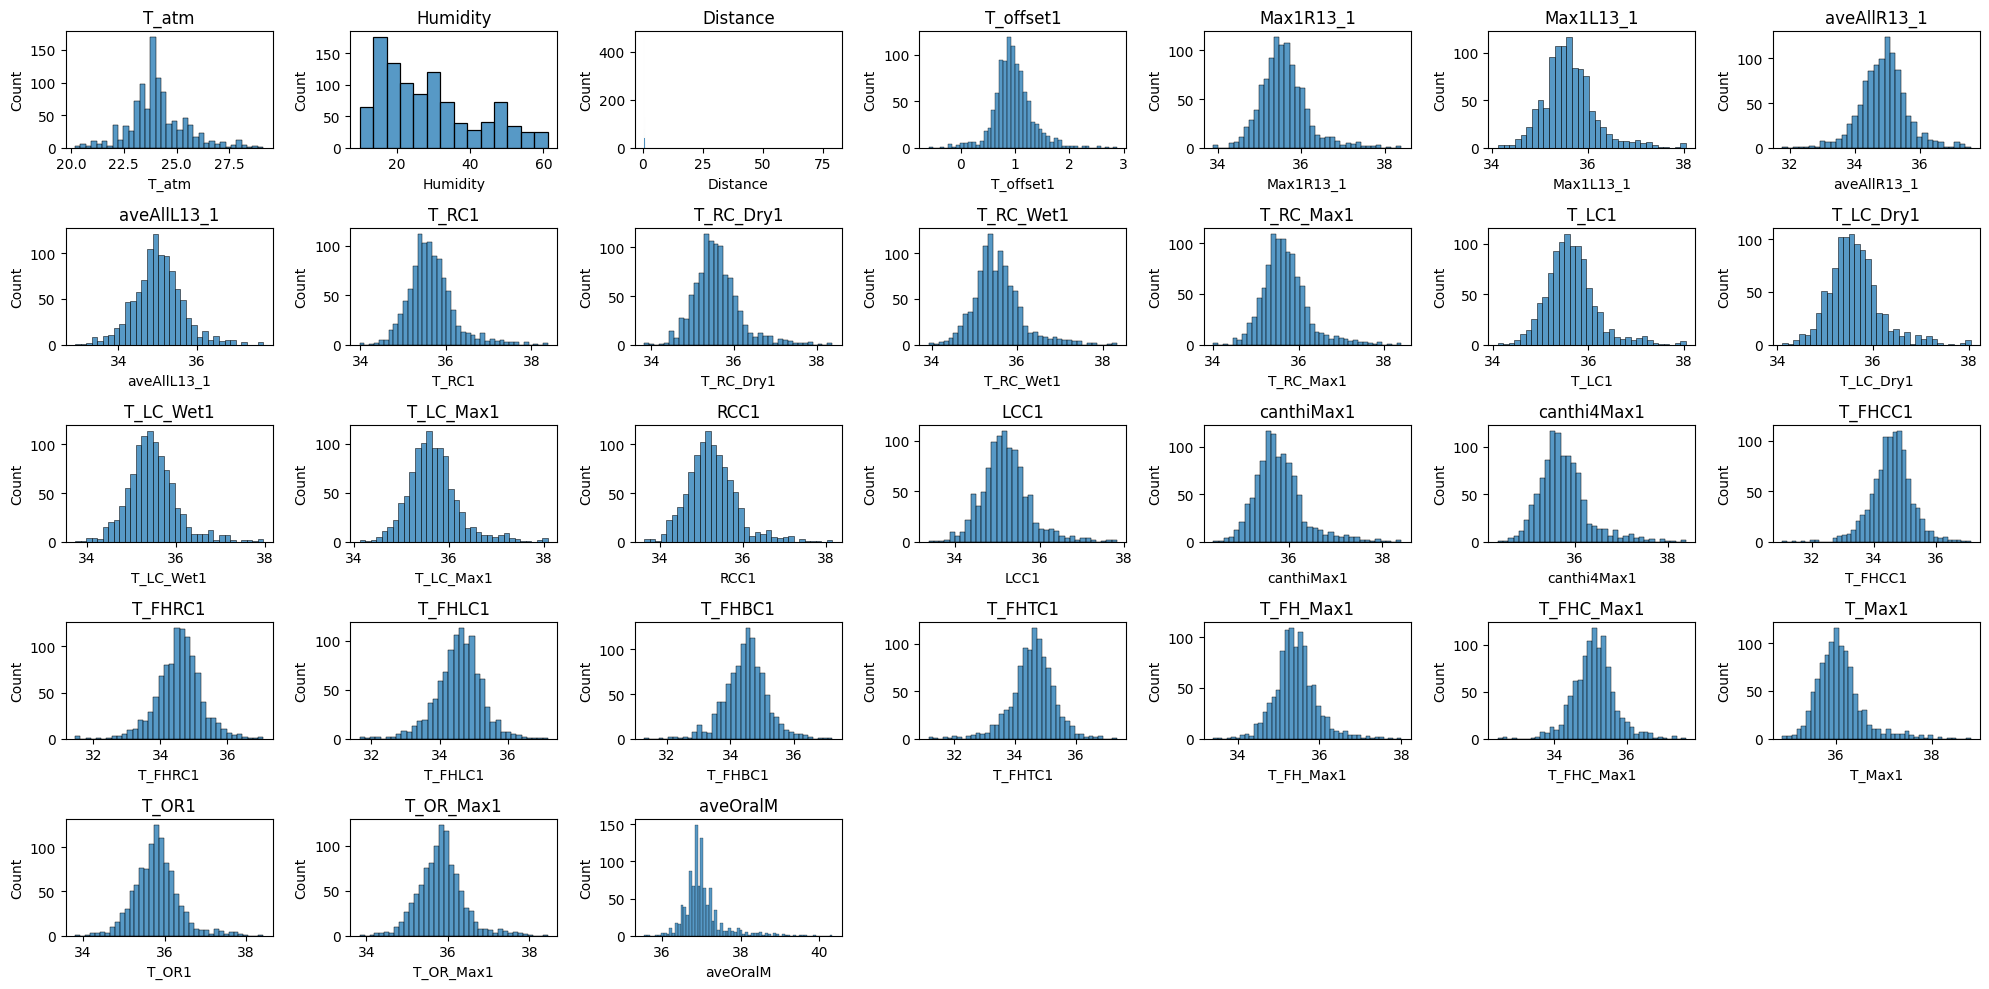

ValueError: could not convert string to float: 'Male'

<Figure size 1200x1000 with 0 Axes>

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- df_infrared ---
print("DataFrame: df_infrared")
display(df_infrared.info())
display(df_infrared.describe())
print(f"Duplicate rows: {df_infrared.duplicated().sum()}")

# Histograms for numerical features
plt.figure(figsize=(20, 10))
for i, col in enumerate(df_infrared.select_dtypes(include=['number']).columns):
    plt.subplot(5, 7, i + 1)
    sns.histplot(df_infrared[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Correlation matrix and heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_infrared.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Matrix for Infrared Data")
plt.show()

# Target variable: aveOralM (Average Oral Temperature)
# Reasoning:  The primary goal appears to be temperature measurement. aveOralM seems the most direct measure.

# --- df_boston ---
print("\nDataFrame: df_boston")
display(df_boston.info())
display(df_boston.describe())
print(f"Duplicate rows: {df_boston.duplicated().sum()}")

# Histograms and boxplots for numerical features
plt.figure(figsize=(12, 8))
for i, col in enumerate(df_boston.select_dtypes(include=['number']).columns):
    plt.subplot(3, 5, i + 1)
    sns.histplot(df_boston[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Correlation matrix and heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_boston.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Matrix for Boston Housing Data')
plt.show()

# Target Variable: medv (Median house value)
# Reasoning: The description clearly states 'medv' is the target variable.

# --- df_automobile ---
print("\nDataFrame: df_automobile")
display(df_automobile.info())
display(df_automobile.describe())
print(f"Duplicate rows: {df_automobile.duplicated().sum()}")

# Histograms for numerical features
plt.figure(figsize=(18, 10))
for i, col in enumerate(df_automobile.select_dtypes(include=['number']).columns):
    plt.subplot(4, 6, i + 1)  # Adjust subplot grid as needed
    sns.histplot(df_automobile[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Correlation matrix and heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_automobile.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Matrix for Automobile Data')
plt.show()

# Target variable: price
# Reasoning: Predicting the price of automobiles is a common task in this type of dataset.


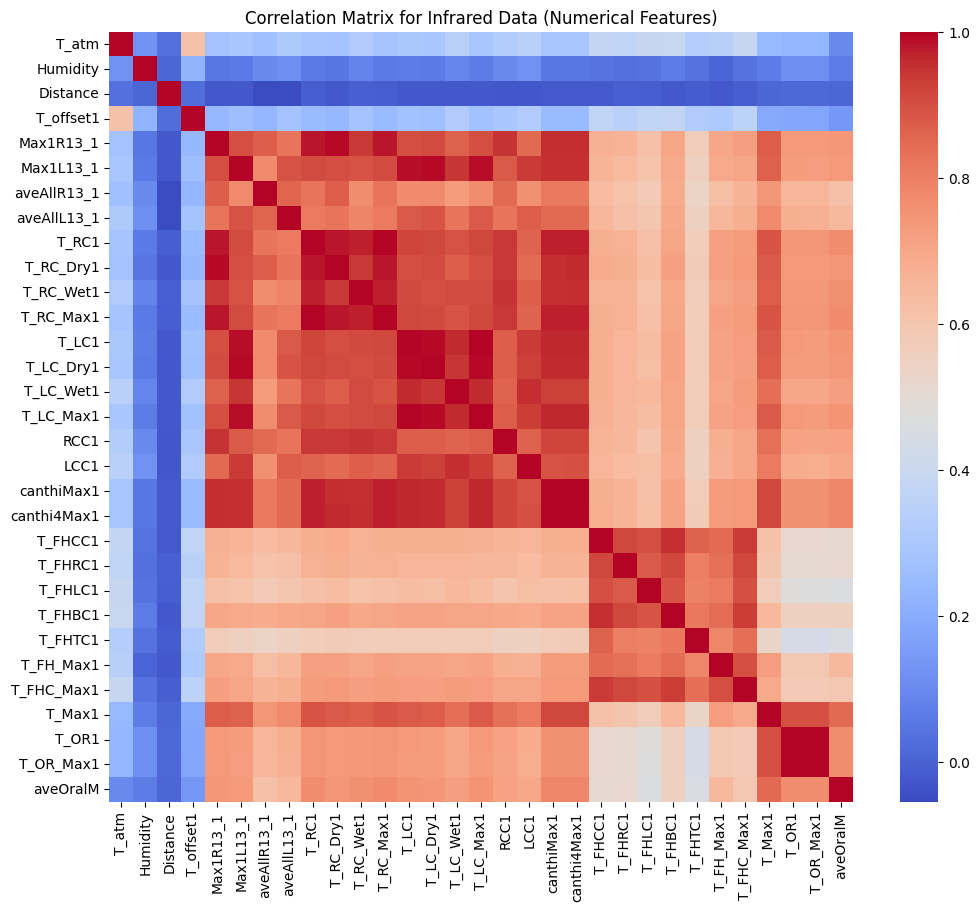

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

numeric_cols = df_infrared.select_dtypes(include=np.number).columns
plt.figure(figsize=(12, 10))
sns.heatmap(df_infrared[numeric_cols].corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Matrix for Infrared Data (Numerical Features)")
plt.show()

In [6]:
import pandas as pd
import numpy as np

# --- df_infrared ---
print("df_infrared Missing Values Before Cleaning:")
print(df_infrared.isnull().sum())

# Impute missing values in numerical columns with the mean
for col in df_infrared.select_dtypes(include=np.number).columns:
    df_infrared[col].fillna(df_infrared[col].mean(), inplace=True)

# Impute missing values in categorical columns with the most frequent value
for col in df_infrared.select_dtypes(exclude=np.number).columns:
    df_infrared[col].fillna(df_infrared[col].mode()[0], inplace=True)

print("\ndf_infrared Missing Values After Cleaning:")
print(df_infrared.isnull().sum())

# --- df_boston ---
print("\ndf_boston Missing Values Before Cleaning:")
print(df_boston.isnull().sum())
# No missing values in df_boston

# --- df_automobile ---
print("\ndf_automobile Missing Values Before Cleaning:")
print(df_automobile.isnull().sum())

# Impute 'normalized-losses' with the mean
df_automobile['normalized-losses'].fillna(df_automobile['normalized-losses'].mean(), inplace=True)

# Impute 'num-of-doors' with the mode
df_automobile['num-of-doors'].fillna(df_automobile['num-of-doors'].mode()[0], inplace=True)

# Impute 'bore', 'stroke', 'horsepower', 'peak-rpm' with the mean
for col in ['bore', 'stroke', 'horsepower', 'peak-rpm']:
    df_automobile[col].fillna(df_automobile[col].mean(), inplace=True)

print("\ndf_automobile Missing Values After Cleaning:")
print(df_automobile.isnull().sum())

# --- Outlier Handling and Data Type Conversion (Example for df_boston) ---

# Example: Winsorizing 'lstat' in df_boston
from scipy.stats.mstats import winsorize
df_boston['lstat'] = winsorize(df_boston['lstat'], limits=[0.05, 0.05])

# Convert 'chas' to categorical in df_boston
df_boston['chas'] = df_boston['chas'].astype('category')


# ... (similar outlier handling and type conversion for other dataframes) ...

df_infrared_cleaned = df_infrared.copy()
df_boston_cleaned = df_boston.copy()
df_automobile_cleaned = df_automobile.copy()

df_infrared Missing Values Before Cleaning:
Gender         0
Age            0
Ethnicity      0
T_atm          0
Humidity       0
Distance       0
T_offset1      0
Max1R13_1      0
Max1L13_1      0
aveAllR13_1    0
aveAllL13_1    0
T_RC1          0
T_RC_Dry1      0
T_RC_Wet1      0
T_RC_Max1      0
T_LC1          0
T_LC_Dry1      0
T_LC_Wet1      0
T_LC_Max1      0
RCC1           0
LCC1           0
canthiMax1     0
canthi4Max1    0
T_FHCC1        0
T_FHRC1        0
T_FHLC1        0
T_FHBC1        0
T_FHTC1        0
T_FH_Max1      0
T_FHC_Max1     0
T_Max1         0
T_OR1          0
T_OR_Max1      0
aveOralM       0
dtype: int64

df_infrared Missing Values After Cleaning:
Gender         0
Age            0
Ethnicity      0
T_atm          0
Humidity       0
Distance       0
T_offset1      0
Max1R13_1      0
Max1L13_1      0
aveAllR13_1    0
aveAllL13_1    0
T_RC1          0
T_RC_Dry1      0
T_RC_Wet1      0
T_RC_Max1      0
T_LC1          0
T_LC_Dry1      0
T_LC_Wet1      0
T_LC_Max1      

/tmp/ipython-input-6-3312502808.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_infrared[col].fillna(df_infrared[col].mean(), inplace=True)
/tmp/ipython-input-6-3312502808.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [7]:
import pandas as pd
import numpy as np
from scipy.stats.mstats import winsorize

# --- df_infrared ---
# Outlier handling (example: winsorize 'T_atm')
df_infrared['T_atm'] = winsorize(df_infrared['T_atm'], limits=[0.05, 0.05])

# Data type conversion (example: convert 'Gender' to category)
df_infrared['Gender'] = df_infrared['Gender'].astype('category')


# --- df_boston ---
# Data type conversion (example: convert 'rad' to category)
df_boston['rad'] = df_boston['rad'].astype('category')


# --- df_automobile ---
# Outlier handling (example: winsorize 'price')
df_automobile['price'] = winsorize(df_automobile['price'], limits=[0.05, 0.05])

# Data type conversion (example: convert 'symboling' to category)
df_automobile['symboling'] = df_automobile['symboling'].astype('category')

df_infrared_cleaned = df_infrared.copy()
df_boston_cleaned = df_boston.copy()
df_automobile_cleaned = df_automobile.copy()

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# --- df_infrared_cleaned ---
# Feature Engineering
df_infrared_cleaned['temp_diff'] = df_infrared_cleaned['T_Max1'] - df_infrared_cleaned['aveOralM']
# ... add more features as needed

# Data Splitting
X_infrared = df_infrared_cleaned.drop('aveOralM', axis=1)
y_infrared = df_infrared_cleaned['aveOralM']
X_train_infrared, X_test_infrared, y_train_infrared, y_test_infrared = train_test_split(
    X_infrared, y_infrared, test_size=0.2, random_state=42
)

# --- df_boston_cleaned ---
# Feature Engineering
df_boston_cleaned['rooms_per_family'] = df_boston_cleaned['rm'] / df_boston_cleaned['lstat']
# ... add more features as needed

# Data Splitting
X_boston = df_boston_cleaned.drop('medv', axis=1)
y_boston = df_boston_cleaned['medv']
X_train_boston, X_test_boston, y_train_boston, y_test_boston = train_test_split(
    X_boston, y_boston, test_size=0.2, random_state=42
)

# --- df_automobile_cleaned ---
# Feature Engineering
df_automobile_cleaned['engine_power'] = df_automobile_cleaned['horsepower'] * df_automobile_cleaned['engine-size']
# ... add more features as needed

# Data Splitting
X_automobile = df_automobile_cleaned.drop('price', axis=1)
y_automobile = df_automobile_cleaned['price']
X_train_automobile, X_test_automobile, y_train_automobile, y_test_automobile = train_test_split(
    X_automobile, y_automobile, test_size=0.2, random_state=42
)


# Categorical Feature Handling and Numerical Feature Scaling (Example for df_infrared)
categorical_cols_infrared = X_train_infrared.select_dtypes(include=['category', 'object']).columns
numerical_cols_infrared = X_train_infrared.select_dtypes(include=['number']).columns

# One-hot encode categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_train_cat_infrared = encoder.fit_transform(X_train_infrared[categorical_cols_infrared])
encoded_test_cat_infrared = encoder.transform(X_test_infrared[categorical_cols_infrared])


# Scale numerical features
scaler = StandardScaler()
scaled_train_num_infrared = scaler.fit_transform(X_train_infrared[numerical_cols_infrared])
scaled_test_num_infrared = scaler.transform(X_test_infrared[numerical_cols_infrared])

# ... repeat similar processing for df_boston and df_automobile

In [15]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Initialize dictionaries to store models
models = {}

# --- Infrared Dataset ---
print("Training models on Infrared dataset...")

# Define numerical and categorical columns for infrared dataset
categorical_cols_infrared = X_train_infrared.select_dtypes(include=['category', 'object']).columns
numerical_cols_infrared = X_train_infrared.select_dtypes(include=['number']).columns

# Convert 'Age' column to numerical representation
X_train_infrared['Age'] = X_train_infrared['Age'].map({'21-30': 25.5, '31-40': 35.5, '41-50': 45.5, '51-60': 55.5, '61-70': 65.5, '71-80': 75.5, '81-90': 85.5, '91-100': 95.5})
X_test_infrared['Age'] = X_test_infrared['Age'].map({'21-30': 25.5, '31-40': 35.5, '41-50': 45.5, '51-60': 55.5, '61-70': 65.5, '71-80': 75.5, '81-90': 85.5, '91-100': 95.5})

# One-hot encode categorical columns
X_train_infrared = pd.get_dummies(X_train_infrared, columns=categorical_cols_infrared, drop_first=True)
X_test_infrared = pd.get_dummies(X_test_infrared, columns=categorical_cols_infrared, drop_first=True)

# Align columns after one-hot encoding
X_train_infrared, X_test_infrared = X_train_infrared.align(X_test_infrared, join='left', axis=1, fill_value=0)


bagging_infrared = RandomForestRegressor(random_state=42)
bagging_infrared.fit(X_train_infrared, y_train_infrared)

boosting_infrared = XGBRegressor(objective='reg:squarederror', random_state=42)
boosting_infrared.fit(X_train_infrared, y_train_infrared)

models['infrared'] = {'bagging': bagging_infrared, 'boosting': boosting_infrared}

print("\nTraining models on Boston Housing dataset...")

# Define numerical and categorical columns for boston dataset
categorical_cols_boston = X_train_boston.select_dtypes(include=['category', 'object']).columns
numerical_cols_boston = X_train_boston.select_dtypes(include=['number']).columns

# One-hot encode categorical columns
X_train_boston = pd.get_dummies(X_train_boston, columns=categorical_cols_boston, drop_first=True)
X_test_boston = pd.get_dummies(X_test_boston, columns=categorical_cols_boston, drop_first=True)

# Align columns after one-hot encoding
X_train_boston, X_test_boston = X_train_boston.align(X_test_boston, join='left', axis=1, fill_value=0)

# Scale numerical features (optional, but good practice for some models like linear models)
# scaler_boston = StandardScaler()
# X_train_boston[numerical_cols_boston] = scaler_boston.fit_transform(X_train_boston[numerical_cols_boston])
# X_test_boston[numerical_cols_boston] = scaler_boston.transform(X_test_boston[numerical_cols_boston])


bagging_boston = RandomForestRegressor(random_state=42)
bagging_boston.fit(X_train_boston, y_train_boston)

boosting_boston = XGBRegressor(objective='reg:squarederror', random_state=42)
boosting_boston.fit(X_train_boston, y_train_boston)

models['boston'] = {'bagging': bagging_boston, 'boosting': boosting_boston}


# --- df_automobile_cleaned ---
print("\nTraining models on Automobile dataset...")

# Define numerical and categorical columns for automobile dataset
categorical_cols_automobile = X_train_automobile.select_dtypes(include=['category', 'object']).columns
numerical_cols_automobile = X_train_automobile.select_dtypes(include=['number']).columns

# One-hot encode categorical columns
X_train_automobile = pd.get_dummies(X_train_automobile, columns=categorical_cols_automobile, drop_first=True)
X_test_automobile = pd.get_dummies(X_test_automobile, columns=categorical_cols_automobile, drop_first=True)

# Align columns after one-hot encoding
X_train_automobile, X_test_automobile = X_train_automobile.align(X_test_automobile, join='left', axis=1, fill_value=0)

# Scale numerical features
# scaler_automobile = StandardScaler()
# X_train_automobile[numerical_cols_automobile] = scaler_automobile.fit_transform(X_train_automobile[numerical_cols_automobile])
# X_test_automobile[numerical_cols_automobile] = scaler_automobile.transform(X_test_automobile[numerical_cols_automobile])


bagging_automobile = RandomForestRegressor(random_state=42)
bagging_automobile.fit(X_train_automobile, y_train_automobile)

boosting_automobile = XGBRegressor(objective='reg:squarederror', random_state=42)
boosting_automobile.fit(X_train_automobile, y_train_automobile)

models['automobile'] = {'bagging': bagging_automobile, 'boosting': boosting_automobile}

print("Model training completed.")


Training models on Infrared dataset...

Training models on Boston Housing dataset...

Training models on Automobile dataset...
Model training completed.


,Dataset,Model,RMSE,MSE,R-squared
0,Infrared,Bagging,0.077660,6.031033e-03,0.971359
1,Infrared,Boosting,0.071397,5.097534e-03,0.975792
2,Boston,Bagging,2.771925,7.683570e+00,0.895225
3,Boston,Boosting,2.510698,6.303603e+00,0.914042
4,Automobile,Bagging,3830.238965,1.467073e+07,0.831499
5,Automobile,Boosting,3225.457634,1.040358e+07,0.880509


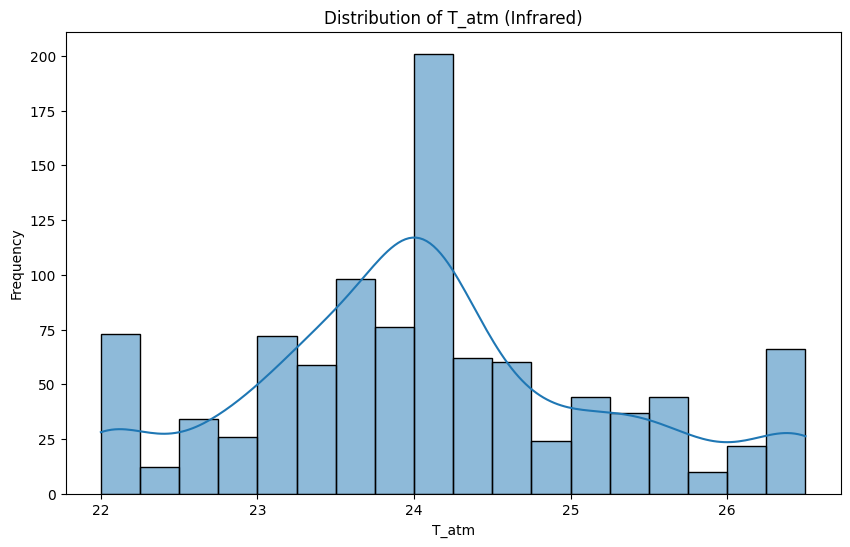

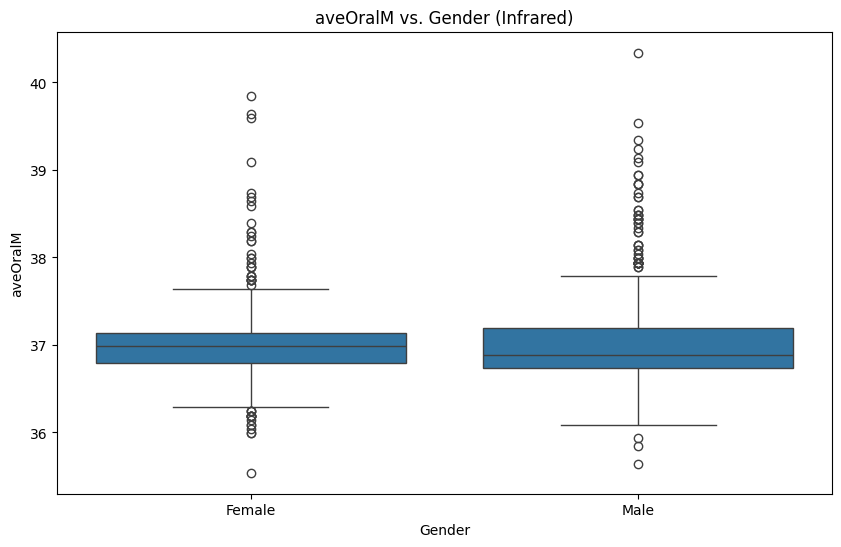

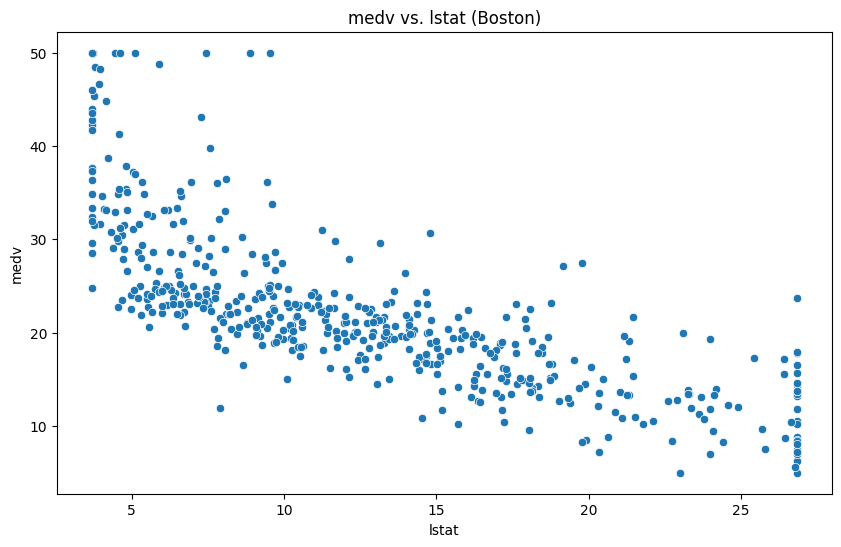

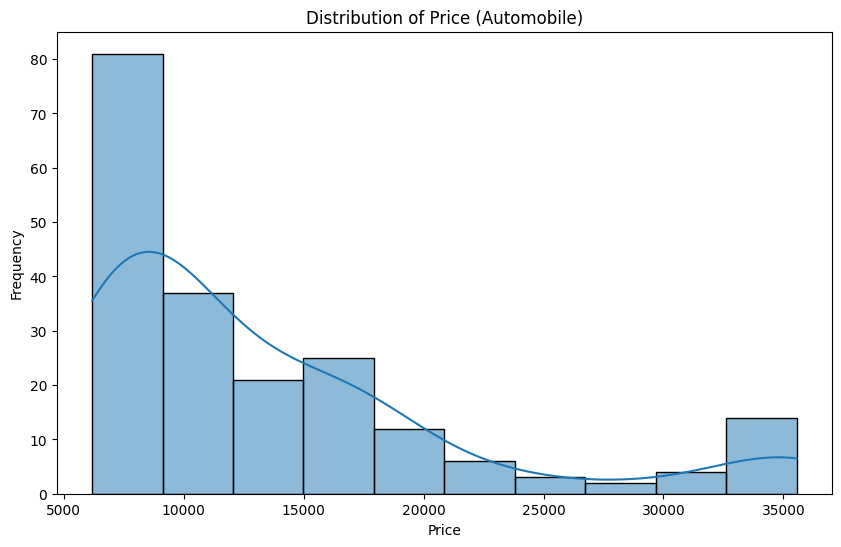

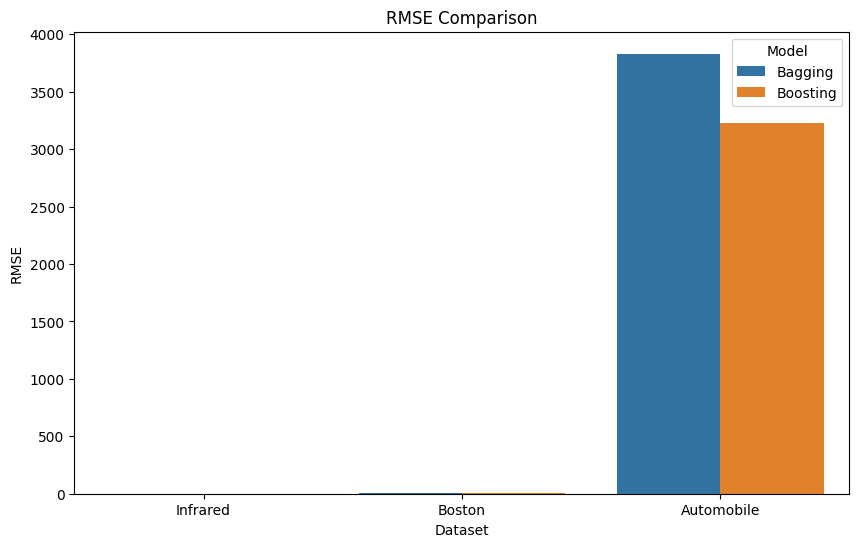

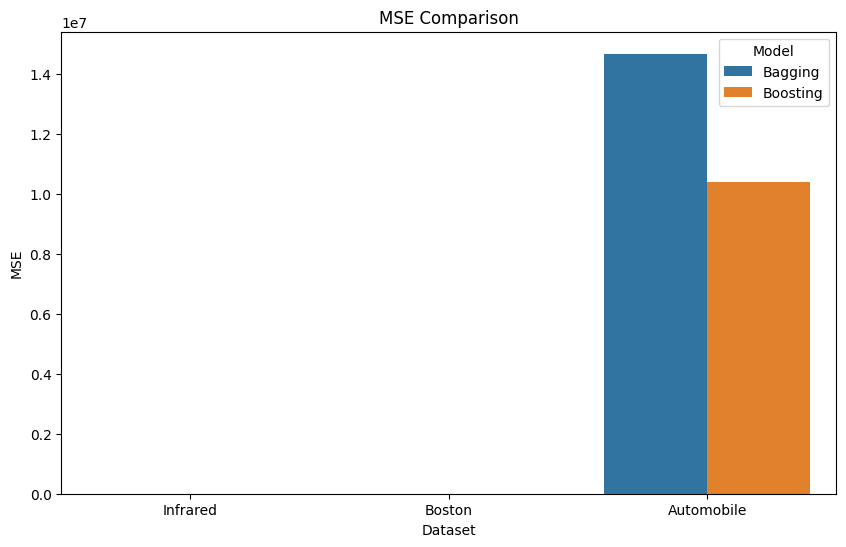

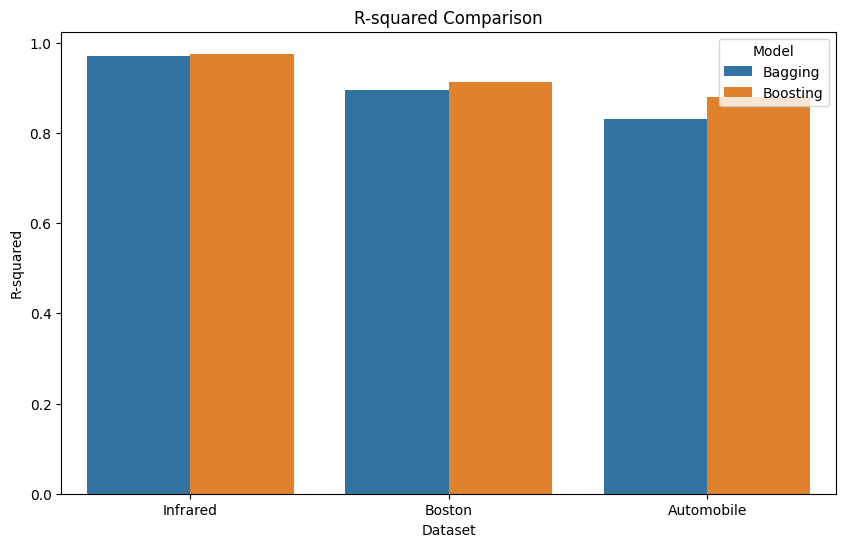

In [19]:
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

results = []

# Infrared dataset
y_pred_infrared_bagging = models['infrared']['bagging'].predict(X_test_infrared)
y_pred_infrared_boosting = models['infrared']['boosting'].predict(X_test_infrared)

rmse_infrared_bagging = np.sqrt(mean_squared_error(y_test_infrared, y_pred_infrared_bagging))
mse_infrared_bagging = mean_squared_error(y_test_infrared, y_pred_infrared_bagging)
r2_infrared_bagging = r2_score(y_test_infrared, y_pred_infrared_bagging)

rmse_infrared_boosting = np.sqrt(mean_squared_error(y_test_infrared, y_pred_infrared_boosting))
mse_infrared_boosting = mean_squared_error(y_test_infrared, y_pred_infrared_boosting)
r2_infrared_boosting = r2_score(y_test_infrared, y_pred_infrared_boosting)

results.extend([
    {'Dataset': 'Infrared', 'Model': 'Bagging', 'RMSE': rmse_infrared_bagging, 'MSE': mse_infrared_bagging, 'R-squared': r2_infrared_bagging},
    {'Dataset': 'Infrared', 'Model': 'Boosting', 'RMSE': rmse_infrared_boosting, 'MSE': mse_infrared_boosting, 'R-squared': r2_infrared_boosting}
])

# Boston dataset
y_pred_boston_bagging = models['boston']['bagging'].predict(X_test_boston)
y_pred_boston_boosting = models['boston']['boosting'].predict(X_test_boston)

rmse_boston_bagging = np.sqrt(mean_squared_error(y_test_boston, y_pred_boston_bagging))
mse_boston_bagging = mean_squared_error(y_test_boston, y_pred_boston_bagging)
r2_boston_bagging = r2_score(y_test_boston, y_pred_boston_bagging)

rmse_boston_boosting = np.sqrt(mean_squared_error(y_test_boston, y_pred_boston_boosting))
mse_boston_boosting = mean_squared_error(y_test_boston, y_pred_boston_boosting)
r2_boston_boosting = r2_score(y_test_boston, y_pred_boston_boosting)

results.extend([
    {'Dataset': 'Boston', 'Model': 'Bagging', 'RMSE': rmse_boston_bagging, 'MSE': mse_boston_bagging, 'R-squared': r2_boston_bagging},
    {'Dataset': 'Boston', 'Model': 'Boosting', 'RMSE': rmse_boston_boosting, 'MSE': mse_boston_boosting, 'R-squared': r2_boston_boosting}
])

# Automobile dataset
y_pred_automobile_bagging = models['automobile']['bagging'].predict(X_test_automobile)
y_pred_automobile_boosting = models['automobile']['boosting'].predict(X_test_automobile)

rmse_automobile_bagging = np.sqrt(mean_squared_error(y_test_automobile, y_pred_automobile_bagging))
mse_automobile_bagging = mean_squared_error(y_test_automobile, y_pred_automobile_bagging)
r2_automobile_bagging = r2_score(y_test_automobile, y_pred_automobile_bagging)

rmse_automobile_boosting = np.sqrt(mean_squared_error(y_test_automobile, y_pred_automobile_boosting))
mse_automobile_boosting = mean_squared_error(y_test_automobile, y_pred_automobile_boosting)
r2_automobile_boosting = r2_score(y_test_automobile, y_pred_automobile_boosting)

results.extend([
    {'Dataset': 'Automobile', 'Model': 'Bagging', 'RMSE': rmse_automobile_bagging, 'MSE': mse_automobile_bagging, 'R-squared': r2_automobile_bagging},
    {'Dataset': 'Automobile', 'Model': 'Boosting', 'RMSE': rmse_automobile_boosting, 'MSE': mse_automobile_boosting, 'R-squared': r2_automobile_boosting}
])

evaluation_df = pd.DataFrame(results)
display(evaluation_df)

# Data Exploration Visualizations
plt.figure(figsize=(10, 6))
sns.histplot(df_infrared_cleaned['T_atm'], kde=True)
plt.title('Distribution of T_atm (Infrared)')
plt.xlabel('T_atm')
plt.ylabel('Frequency')
plt.savefig('t_atm_distribution.png')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='aveOralM', data=df_infrared_cleaned)
plt.title('aveOralM vs. Gender (Infrared)')
plt.savefig('aveOralM_vs_Gender.png')
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(x='lstat', y='medv', data=df_boston_cleaned)
plt.title('medv vs. lstat (Boston)')
plt.savefig('medv_vs_lstat.png')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df_automobile_cleaned['price'], kde=True)
plt.title('Distribution of Price (Automobile)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.savefig('price_distribution.png')
plt.show()


# Model Evaluation Visualizations
plt.figure(figsize=(10, 6))
sns.barplot(x='Dataset', y='RMSE', hue='Model', data=evaluation_df)
plt.title('RMSE Comparison')
plt.savefig('rmse_comparison.png')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Dataset', y='MSE', hue='Model', data=evaluation_df)
plt.title('MSE Comparison')
plt.savefig('mse_comparison.png')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Dataset', y='R-squared', hue='Model', data=evaluation_df)
plt.title('R-squared Comparison')
plt.savefig('r2_comparison.png')
plt.show()

## Mathematical Formulas and Explanations

### RMSE (Root Mean Squared Error)
**Formula:**  
$$
RMSE = \sqrt{MSE} = \sqrt{\frac{1}{n} \sum (y_i - \hat{y}_i)^2}
$$

**Variables:**  
- **n**: Jumlah total data dalam dataset yang digunakan untuk evaluasi.  
- **yi**: Nilai aktual dari variabel target pada data ke-i.  
- **ŷi**: Nilai yang diprediksi oleh model untuk data ke-i.

Penjelasan: RMSE mengukur rata-rata selisih antara nilai prediksi dan nilai aktual dalam satuan yang sama dengan variabel target. Semakin rendah RMSE, semakin baik kecocokan model.

Interpretasi: Nilai yang lebih rendah lebih baik, menunjukkan kesalahan prediksi yang lebih kecil.

Keterbatasan: Sensitif terhadap outlier, karena kesalahan besar akan dikuadratkan.

---

### MSE (Mean Squared Error)
**Formula:**  
$$
MSE = \frac{1}{n} \sum (y_i - \hat{y}_i)^2
$$

**Variables:**  
- **n**: Jumlah total data dalam dataset yang digunakan untuk evaluasi.  
- **yi**: Nilai aktual dari variabel target pada data ke-i.  
- **ŷi**: Nilai yang diprediksi oleh model untuk data ke-i.  

Penjelasan: MSE menghitung rata-rata dari selisih kuadrat antara nilai prediksi dan nilai aktual. Kuadrat ini menekankan kesalahan yang lebih besar.

Interpretasi: Nilai yang lebih rendah lebih baik; MSE yang lebih kecil menunjukkan akurasi prediksi yang lebih tinggi.

Keterbatasan: Sensitif terhadap outlier, dan satuan dari MSE adalah kuadrat dari satuan variabel target, sehingga interpretasinya kurang intuitif.

---

### R-squared (Coefficient of Determination)
**Formula:**  
$$
R^2 = 1 - \frac{SS_{res}}{SS_{tot}}
$$

**Variables:**  
- **SSres (Residual Sum of Squares)**: Jumlah kuadrat dari selisih antara nilai aktual dan nilai prediksi model.  
- **SStot (Total Sum of Squares)**: Jumlah kuadrat dari selisih antara nilai aktual dan rata-rata nilai aktual dalam dataset.

Penjelasan: R² menunjukkan proporsi variansi pada variabel target yang dapat dijelaskan oleh variabel independen. SSres adalah jumlah kuadrat residual (kesalahan), dan SStot adalah jumlah kuadrat total (variansi total).

Interpretasi: Bernilai antara 0 hingga 1. Semakin tinggi nilai R², semakin baik kecocokan model karena lebih banyak variansi yang dapat dijelaskan.

Keterbatasan: Bisa menyesatkan jika digunakan untuk membandingkan model dengan jumlah fitur yang berbeda. Tidak menunjukkan seberapa baik prediksi model.   


